In [1]:
import pandas as pd
import numpy as np
import pickle
from  sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [2]:
def make_categorical(data, column, categories_code):
    
    # Fonction pour passer les donnes au type categorical avec les memes code que
    # on a utilise pour le modele
    
    data[column] = pd.Categorical(data[column], categories=categories_code[column])
    data[(column + '_code')] = data[column].cat.codes
    return data

In [46]:
def plot_bar(prediction, n_hopital):
    
    # Visualiser la prediction de sejour pour un hopital
    
    height = [0] * 11
    for i in range(len(np.unique(prediction, return_counts=True)[0])):
        x = np.unique(prediction, return_counts=True)[0][i]
        height[x] = np.unique(prediction, return_counts=True)[1][i]
    fig, ax = plt.subplots()
    fig1 = ax.barh(y=categories_code['Stay'], width=height)
    ax.set_title(f'Prediction de Sejours pour le hopital n.{n_hopital}')
    plt.show()

In [49]:
def hopital(data, n_hopital):
    
    # Faire prediction de un hopital en specifique (n_hopital)
    # On visualise le resultat avec plot_bar
    
    data = data[data['Hospital_code'] == n_hopital]
    data = data.drop(['index', 'patientid', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
                          'Hospital_region_code', 'City_Code_Patient'], axis = 1)
    prediction = model.predict(normalize(data))
    fig1 = plot_bar(prediction, n_hopital)

In [5]:
with open('model.pkl', 'rb') as file:
    # Charger le modele
    model = pickle.load(file)
    
with open('categories_code.pkl', 'rb') as file:
    # Charger les codes de categories utilises
    categories_code = pickle.load(file)

In [6]:
model

LogisticRegression(max_iter=300, multi_class='multinomial')

In [55]:
data = pd.read_csv('../data/ToS/test.csv')
data.shape

(137057, 17)

In [56]:
data = data.dropna()
# On simule que un patient peut etre seulement dans un hopital (le meme jour)
data = data.drop_duplicates(subset='patientid')

In [57]:
# le meme hopital a les memes quantite des lits dans un jour
data['Available Extra Rooms in Hospital'] = data.groupby('Hospital_code')['Available Extra Rooms in Hospital'].transform('max')
data['Available Extra Rooms in Hospital'] = data['Available Extra Rooms in Hospital'].astype(int)
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,7,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
14,318453,19,a,7,Y,7,gynecology,S,C,2.0,40728,8.0,Emergency,Moderate,4,51-60,3288.0
23,318462,6,a,6,X,8,anesthesia,R,F,3.0,128946,7.0,Emergency,Moderate,4,51-60,4596.0
31,318470,31,c,3,Z,9,gynecology,R,A,2.0,111851,14.0,Emergency,Extreme,3,41-50,4204.0
36,318475,23,a,6,X,9,gynecology,R,F,3.0,71555,1.0,Emergency,Minor,2,41-50,3090.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,9,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0
137053,455492,25,e,1,X,7,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0
137054,455493,30,c,3,Z,8,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0
137055,455494,5,a,1,X,9,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0


In [58]:
train = pd.read_csv('data_patient_num.csv')
# Simule le historique de un patient
n_visit = train.groupby('patientid')['n_visit'].max()

In [59]:
data.set_index('patientid')
data['n_visit'] = n_visit
data = data.fillna(-1)
data['n_visit'] += 1

In [60]:
data.reset_index(level=0, inplace=True)

In [61]:
data = make_categorical(data, 'Ward_Type', categories_code)
data = make_categorical(data, 'Ward_Facility_Code', categories_code)
data = make_categorical(data, 'Department', categories_code)
data = make_categorical(data, 'Severity of Illness', categories_code)
data = make_categorical(data, 'Type of Admission', categories_code)
data = make_categorical(data, 'Age', categories_code)

data = data.drop(['case_id', 'Department', 'Type of Admission',
                      'Severity of Illness', 'Age', 'Ward_Type',
                      'Ward_Facility_Code', 'Admission_Deposit'], axis = 1)

n_visit = data['n_visit']
data = data.drop(['n_visit'], axis=1)
data['n_visit'] = n_visit
data

,index,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Ward_Type_code,Ward_Facility_Code_code,Department_code,Severity of Illness_code,Type of Admission_code,Age_code,n_visit
0,0,21,c,3,Z,7,2.0,17006,2.0,2,3,0,2,2,0,7,0.0
1,14,19,a,7,Y,7,2.0,40728,8.0,4,3,2,2,2,0,5,2.0
2,23,6,a,6,X,8,3.0,128946,7.0,4,2,5,1,2,0,5,0.0
3,31,31,c,3,Z,9,2.0,111851,14.0,3,2,0,2,0,0,4,2.0
4,36,23,a,6,X,9,3.0,71555,1.0,2,2,5,2,1,0,4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38830,137052,11,b,2,Y,9,3.0,41160,3.0,4,1,3,1,1,0,4,0.0
38831,137053,25,e,1,X,7,4.0,30985,7.0,2,2,4,3,2,0,0,0.0
38832,137054,30,c,3,Z,8,4.0,81811,12.0,2,2,0,1,1,2,0,0.0
38833,137055,5,a,1,X,9,4.0,57021,10.0,2,2,4,1,1,1,4,0.0


## Voir evolution de 1 hopital

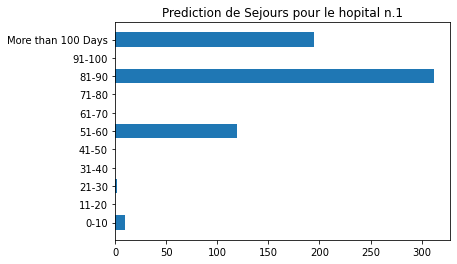

In [50]:
hopital(data,1)

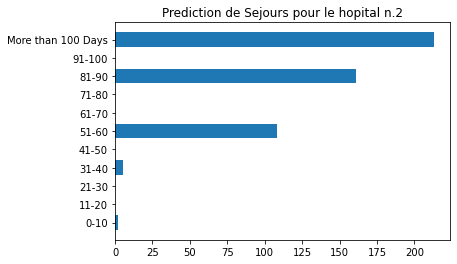

In [51]:
hopital(data,2)

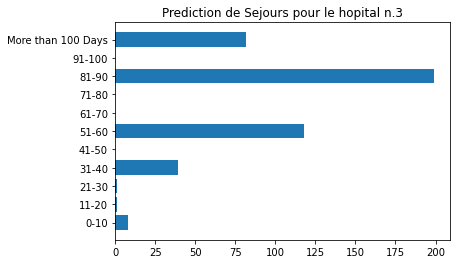

In [52]:
hopital(data,3)

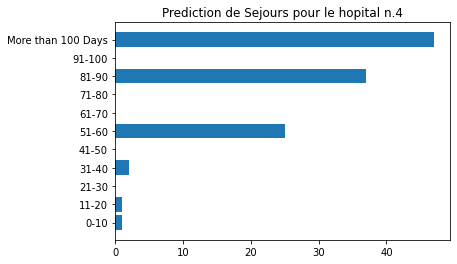

In [53]:
hopital(data,4)

In [104]:
def predire_sejour_patient(data, patientid):
    data = data[data['patientid'] == patientid]
    data = data.drop(['index', 'patientid', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
                          'Hospital_region_code', 'City_Code_Patient'], axis = 1)
    
    predict =  model.predict(normalize(data))[0]
    return categories_code['Stay'][predict]

In [107]:
predire_sejour_patient(data, 128946)

'81-90'